In [17]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

sys.path.append("../")

from src.utils.constants import DATA_DIR, DEVICE
from src.train import train_model
from src.models import PhasePredictor

In [2]:
device = torch.device(DEVICE)

In [3]:
labelled_data = np.load(os.path.join(DATA_DIR, "labelled_dataset.npz"))
unlabelled_data = np.load(os.path.join(DATA_DIR, "unlabelled_dataset.npz"))

In [4]:
X = labelled_data["X"]
Y = labelled_data["Y"]
qual_input_dims = labelled_data['X_qual_num_classes']

In [5]:
num_models = 10

models = [PhasePredictor(input_dim=X.shape[1], qual_input_dims=qual_input_dims, latent_dimension=64) for i in range(num_models)]
for model in models:
    model.to(device)
    train_model(model, X, Y, verbose=True)

/Users/junhalee/Desktop/perovskite-phase-pred/venv39/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 0: Train Loss: 0.6893134330000196, Test Loss: 0.6860411316156387
Epoch 30: Train Loss: 0.35458426816122873, Test Loss: 0.5170044228434563
Epoch 60: Train Loss: 0.21939371606068953, Test Loss: 0.36238305643200874
Epoch 90: Train Loss: 0.1496286698217903, Test Loss: 0.38407672941684723
Epoch 120: Train Loss: 0.17319060782236712, Test Loss: 0.3792586661875248
Epoch 150: Train Loss: 0.1784768711243357, Test Loss: 0.3795359805226326
Epoch 180: Train Loss: 0.1277113232229437, Test Loss: 0.3801635392010212
Epoch 210: Train Loss: 0.20086669416299888, Test Loss: 0.38020186498761177
Epoch 240: Train Loss: 0.18189100096268312, Test Loss: 0.3802058547735214
Epoch 270: Train Loss: 0.24207325386149542, Test Loss: 0.38020965084433556
Epoch 300: Train Loss: 0.12693412974476814, Test Loss: 0.38020412251353264
Epoch 330: Train Loss: 0.18751491393361772, Test Loss: 0.38020930625498295
Epoch 360: Train Loss: 0.1800499872437545, Test Loss: 0.3802214674651623
Epoch 390: Train Loss: 0.18702348747423717

In [6]:
def inference(X):
    predictions = []
    for model in models:
        pred = model(X)
        predictions.append(pred)
    
    # Get the mean and variance of the predictions
    predictions = torch.stack(predictions)
    mean = predictions.mean(dim=0)
    var = predictions.var(dim=0)

    return mean, var

In [12]:
print(unlabelled_data['X'].shape)

(1664, 37)


In [13]:
X = torch.tensor(unlabelled_data['X'], device=device, requires_grad=False).float()

In [14]:
mean, var = inference(X)
std = torch.sqrt(var)

In [15]:
print(mean.max(), var.max())

tensor(0.9967, grad_fn=<MaxBackward1>) tensor(0.0806, grad_fn=<MaxBackward1>)


In [16]:
xi = 1
acquisition = mean + xi * std

(array([1.457e+03, 2.300e+01, 8.000e+00, 1.100e+01, 1.100e+01, 2.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

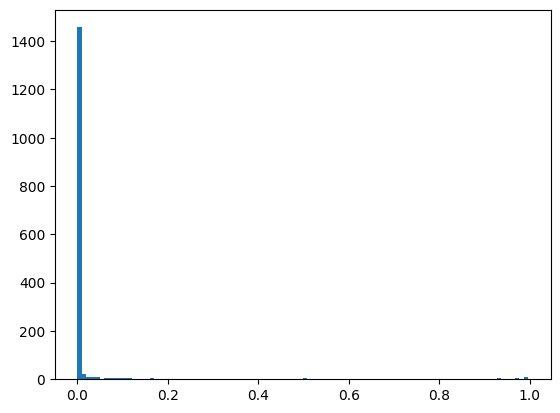

In [19]:
plt.hist(mean.cpu().detach().numpy(), bins=100)

(array([1.429e+03, 1.700e+01, 2.500e+01, 1.700e+01, 1.000e+01, 8.000e+00,
        4.000e+00, 1.300e+01, 6.000e+00, 4.000e+00, 2.000e+00, 9.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

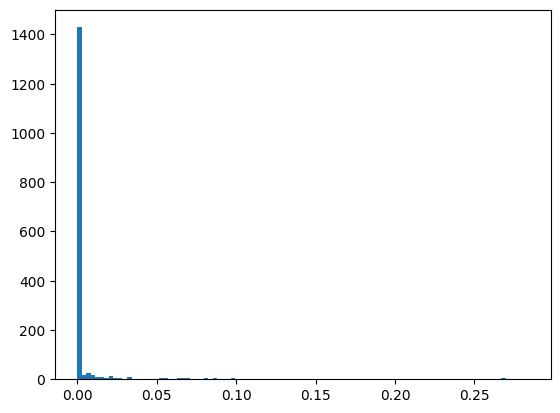

In [20]:
plt.hist(std.cpu().detach().numpy(), bins=100)

In [26]:
indices = np.argsort(acquisition.cpu().detach().numpy().flatten())
print(indices[-10:])



[1468 1261 1260 1301 1256 1403 1262 1299 1427 1280]


In [23]:
acquisition[1280]

tensor([1.0008], grad_fn=<SelectBackward0>)

In [28]:
for reaction in unlabelled_data['reaction_ids'][indices[-10:]]:
    print(reaction)

Pb++ + Br + NCCOP(=O)(O)O
Pb++ + Cl + NCC1CCOCC1
Pb++ + Cl + C1COCCN1
Pb++ + Cl + NC1CC[NH2+]C1
Pb++ + Cl + C1CSCCN1
Pb++ + Cl + NCCN1CCNCC1
Pb++ + Cl + NCCC1CCOCC1
Pb++ + Cl + O=S1(=O)CCNCC1
Pb++ + Cl + CCCN1CCNCC1
Pb++ + Cl + CN1CCC(=O)CC1


In [29]:
for reaction in unlabelled_data['reaction_ids'][indices[:10]]:
    print(reaction)

Cu++ + Cl + NCCOc1ccc2cccc3c4cccc5cccc(c1c23)c54
Cu++ + Cl + NCCCCc1cc2cccc3ccc4cccc1c4c32
Cu++ + Cl + NCCCCOc1ccc2ccc3cccc4ccc1c2c34
Cu++ + Cl + NCCc1cc2cccc3ccc4cccc1c4c32
Cu++ + Cl + NCCCOc1ccc2ccc3cccc4ccc1c2c34
Cu++ + Cl + NCCOc1ccc2ccc3cccc4ccc1c2c34
Cu++ + Cl + NCCc1ccc(-c2ccccc2)cc1
Cu++ + Cl + NCCCCOc1cccc2ccccc12
Cu++ + Cl + NCCc1ccc2ccccc2c1
Cu++ + Cl + NCc1ccc2ccccc2c1


In [34]:
for i in np.flip(indices):
    print(acquisition[i].item(), unlabelled_data['reaction_ids'][i])

1.0008488893508911 Pb++ + Cl + CN1CCC(=O)CC1
0.9987133145332336 Pb++ + Cl + CCCN1CCNCC1
0.9983857870101929 Pb++ + Cl + O=S1(=O)CCNCC1
0.9982739686965942 Pb++ + Cl + NCCC1CCOCC1
0.9982542395591736 Pb++ + Cl + NCCN1CCNCC1
0.9981765747070312 Pb++ + Cl + C1CSCCN1
0.9981627464294434 Pb++ + Cl + NC1CC[NH2+]C1
0.9978465437889099 Pb++ + Cl + C1COCCN1
0.9977346658706665 Pb++ + Cl + NCC1CCOCC1
0.9852260947227478 Pb++ + Br + NCCOP(=O)(O)O
0.9823865294456482 Pb++ + Br + N=C(N)N
0.9821807742118835 Pb++ + Br + Nc1ncco1
0.9800620675086975 Pb++ + Br + Nc1ccc(B(O)O)cc1
0.9799112677574158 Pb++ + Br + NCCOS(=O)(=O)O
0.9795726537704468 Pb++ + Br + NCCCP(=O)(O)O
0.9754314422607422 Pb++ + Br + NC(N)=S
0.9730401039123535 Pb++ + Br + NCc1ccc(B(O)O)cc1
0.9722499847412109 Pb++ + Br + NCCS(=O)(=O)O
0.9703643321990967 Pb++ + Br + NCCCS(=O)(=O)O
0.9665834903717041 Pb++ + Br + c1c[nH]c(-c2ncc[nH]2)n1
0.9615779519081116 Pb++ + Br + CCOc1nnc(OCCN)nn1
0.9601477980613708 Pb++ + Br + NCc1ccco1
0.9597197771072388 Pb++ + 